<a href="https://colab.research.google.com/github/joshuahurd515/ai-and-data-science-work/blob/main/P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Model One**

170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/15
1563/1563 [==============================] - 94s 59ms/step - loss: 2.0794 - accuracy: 0.2171 - val_loss: 1.8862 - val_accuracy: 0.3098
Epoch 2/15
1563/1563 [==============================] - 85s 54ms/step - loss: 1.7633 - accuracy: 0.3574 - val_loss: 1.6707 - val_accuracy: 0.3982
Epoch 3/15
1563/1563 [==============================] - 86s 55ms/step - loss: 1.6036 - accuracy: 0.4202 - val_loss: 1.5355 - val_accuracy: 0.4442
Epoch 4/15
1563/1563 [==============================] - 86s 55ms/step - loss: 1.5039 - accuracy: 0.4566 - val_loss: 1.4561 - val_accuracy: 0.4733
Epoch 5/15
1563/1563 [==============================] - 81s 52ms/step - loss: 1.4242 - accuracy: 0.4865 - val_loss: 1.4189 - val_accuracy: 0.4885
Epoch 6/15
1563/1563 [==============================] - 84s 54ms/step - loss: 1.3623 - accuracy: 0.5117 - val_loss: 1.3672 - val_accuracy: 0.5097
Epoch 7/15
1563/1563 [==============================] - 8

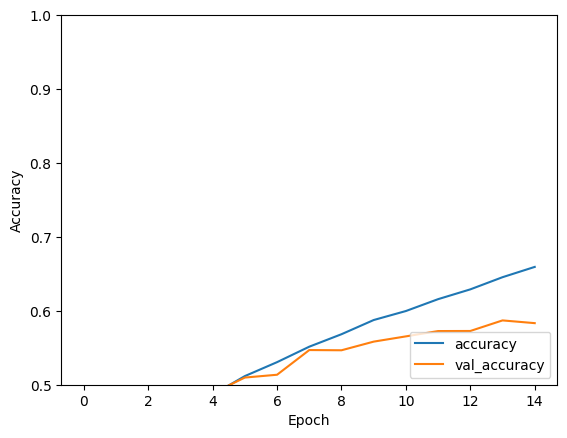

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_data / 255.0, test_data/255.0

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'sigmoid', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.Conv2D(128, (3, 3), activation='sigmoid')) # new layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.5949000120162964


**Model One Evaluation**

This is the base model for this notebook file where really I was just playing around with a bunch of the parameters, but I will walk through the code of this model.

In the given code, the dataset used is CIFAR-10, which contains 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.
Data normalization is performed by dividing each pixel value by 255, so that pixel values lie in the range of 0 and 1. This helps to scale the input features and make them more manageable for the model. The model architecture is a sequential model that consists of 6 layers, including 3 convolutional layers, 2 max pooling layers, and 1 dense layer. The number of layers, number of neurons in each layer, and activation functions used were based on experimentation and commonly used practices in similar models. The addition of a new convolutional layer with 128 filters was an experimental change made to improve the model's performance. The number of epochs was set to 15, which is a reasonable number of iterations for training a deep learning model, but I will discuss in the later models how lowerinf the amount of epochs helped gain a better accuracy.

The accuracy for this model was 59%, which means that there is a lot of room for improvement.


**Model Two**

Epoch 1/10
1563/1563 [==============================] - 87s 55ms/step - loss: 1.3968 - accuracy: 0.5021 - val_loss: 1.1901 - val_accuracy: 0.5807
Epoch 2/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.1246 - accuracy: 0.6057 - val_loss: 1.1022 - val_accuracy: 0.6180
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0291 - accuracy: 0.6410 - val_loss: 1.0116 - val_accuracy: 0.6504
Epoch 4/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.9594 - accuracy: 0.6641 - val_loss: 1.0590 - val_accuracy: 0.6302
Epoch 5/10
1563/1563 [==============================] - 82s 52ms/step - loss: 0.9102 - accuracy: 0.6826 - val_loss: 0.9880 - val_accuracy: 0.6609
Epoch 6/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.8588 - accuracy: 0.7027 - val_loss: 1.0030 - val_accuracy: 0.6615
Epoch 7/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8197 - accuracy: 0.7125 - val_loss: 1.0260 -

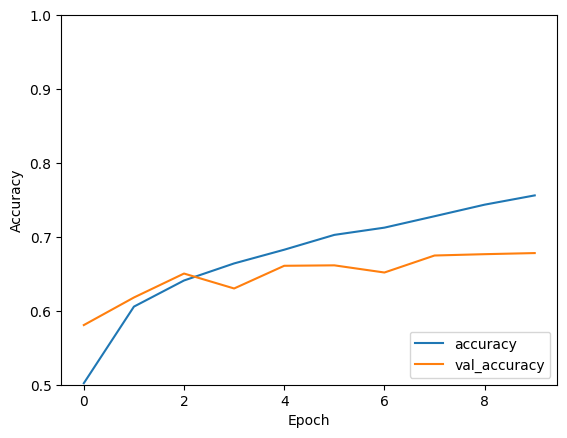

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_data / 255.0, test_data/255.0

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'tanh', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
##model.add(layers.Conv2D(128, (3, 3), activation='tanh')) # new layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.6780999898910522


**Model Two Evaluation**

This second model was able to perform much better than the previous model. Some of the changes that I made were decreasing the amount of layers that were in the model, this was able to help speed up the process of training the model, but I am not totally sure if it helped with the accuracy. Some things that I did that for sure were able to help the accuracy was changing the activation function. I previously was using the sigmoid activation function, wheras in this model, I was using the tanh activation function, which was able to get a much better accuracy for each individual epoch. The last thing that I did was lower the number of epochs, I believe that if I had it much higher, such as at 50 or 60, it would have increasingky gotten better, but it did take a while to run, so this might be something I try later on.

Ultimately, this model performed better than the last model because it ended with an accuracy of 67.8%

**Model Three**

Epoch 1/10
1563/1563 [==============================] - 88s 55ms/step - loss: 1.4884 - accuracy: 0.4598 - val_loss: 1.2324 - val_accuracy: 0.5562
Epoch 2/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.1147 - accuracy: 0.6044 - val_loss: 1.0545 - val_accuracy: 0.6249
Epoch 3/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9511 - accuracy: 0.6659 - val_loss: 0.9878 - val_accuracy: 0.6654
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8492 - accuracy: 0.7020 - val_loss: 0.9438 - val_accuracy: 0.6681
Epoch 5/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.7729 - accuracy: 0.7295 - val_loss: 0.8826 - val_accuracy: 0.6940
Epoch 6/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7092 - accuracy: 0.7514 - val_loss: 0.8779 - val_accuracy: 0.6972
Epoch 7/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.6532 - accuracy: 0.7710 - val_loss: 0.8556 -

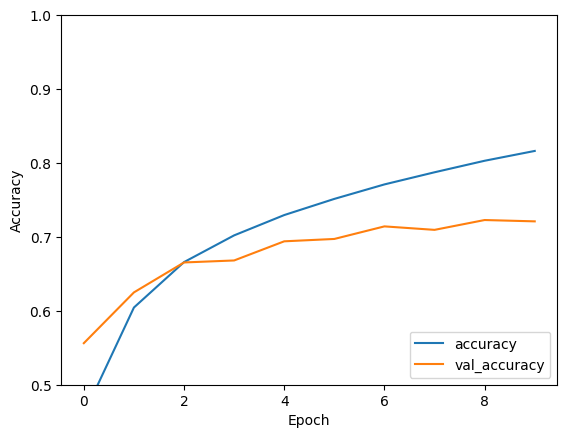

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_data, train_labels), (test_data, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_data / 255.0, test_data/255.0

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

0.7210000157356262


**Model Three Evaluation**

This model ultimately performed much better than both of the previous models. I kept this model exactly the same as the last one, except I changed the activation function to the ReLu function. I think that if I were to change the number of epochs to a much higher number it would perform significantly better, because as you can tell from the graph above, it seems to contantly get much better accuracies, but training the model with such a large number of epochs is very much time consuming, but, this model performed altogether the best with the ReLu activation function being utilized

The accuracy for this model was 72.1%, which is slightly better than model 2, and much better then model 1.